In [1]:
%matplotlib inline
import psycopg2
import psycopg2.extras
import numpy
from matplotlib import pyplot

In [2]:
db = psycopg2.connect("dbname='decat_dev' user='decat' password='<password here>' host='decatdb.lbl.gov'",
                       cursor_factory=psycopg2.extras.DictCursor)

In [3]:
# th"dbname='decat_dev' user='decat' password='<password here>' host='decatdb.lbl.gov'",
                       cursor_factory=psycopg2.extras.DictCursor)is one takes a while (10s of seconds)
cursor = db.cursor()
q = ( "SELECT s.mag,s.magerr FROM galsources s INNER JOIN galimages i ON i.id=s.galimage_id "
      "INNER JOIN galexposures e ON e.id=i.galexposure_id WHERE e.filename='c4d_210324_093844_ori.fits.fz'" )
cursor.execute(q)
rows = cursor.fetchall()
print( f"Got {len(rows)} stars." )

Got 12397903 stars.


In [6]:
mags = numpy.array( [ row['mag'] for row in rows ] )

In [7]:
bins = numpy.arange(10,30,1)
hist,junk = numpy.histogram( mags, bins=bins )

In [8]:
histmag = ( bins[1:] + bins[:-1] ) / 2.


In [9]:
print( f"{hist.shape}  {histmag.shape}" )

(19,)  (19,)


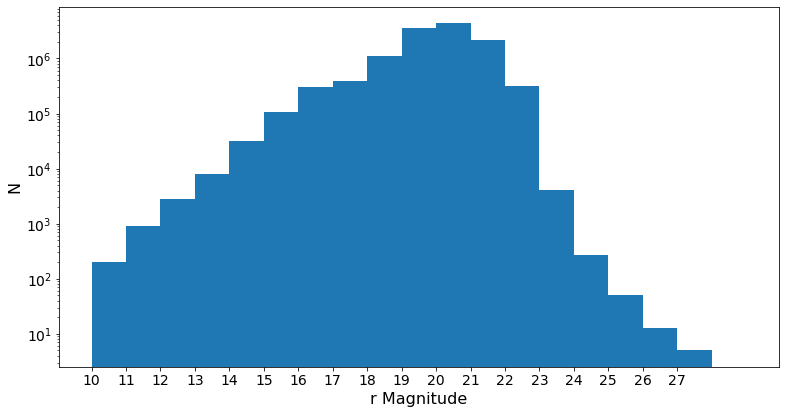

In [24]:
fig = pyplot.figure( figsize=(10, 5) )
ax = fig.add_axes( (0,0,1,1) )
ax.bar( histmag, hist, width=1, log=True )
ax.set_xlabel( "r Magnitude", fontsize=16 )
ax.set_xticks( numpy.arange(10,28,1) )
ax.set_ylabel( "N", fontsize=16 )
ax.tick_params(axis='both', labelsize=14)
fig.show()